# **CIFAR10**

In [323]:
from tensorflow.keras.datasets import cifar10
from matplotlib import pyplot as plt
from tensorflow import keras
import tensorflow.compat.v2 as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical as tcg
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

In [324]:
(xtr,ytr),(xte,yte)=cifar10.load_data()

In [325]:
xtr.shape

(50000, 32, 32, 3)

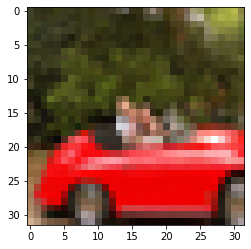

In [326]:
plt.imshow(xtr[99], cmap='gray')

In [327]:
ytr[99]

array([1], dtype=uint8)

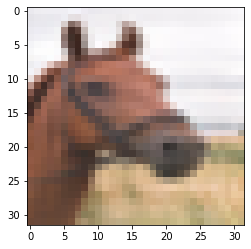

In [328]:
plt.imshow(xte[99], cmap='gray')

In [329]:
yte[99]

array([7], dtype=uint8)

In [330]:
ytr=tcg(ytr)
yte=tcg(yte)

In [331]:
xte=xte.reshape(xte.shape[0],xte.shape[1],xte.shape[2],3).astype('float32')/255
xtr=xtr.reshape(xtr.shape[0],xtr.shape[1],xtr.shape[2],3).astype('float32')/255

In [332]:
model = Sequential([
  Flatten(input_shape=(32, 32, 3)),
  Dense(256, activation='relu'),
  Dense(128, activation='relu'),
  Dense(64, activation='relu'),
  Dense(10, activation='softmax'),
])

In [333]:
model.compile(loss='categorical_crossentropy',optimizer='adam', metrics=['accuracy'])

In [334]:
history = model.fit(xtr,ytr, validation_data=(xte,yte),epochs=13, batch_size=128)

Train on 50000 samples, validate on 10000 samples
Epoch 1/13
50000/50000 [==============================] - 4s 81us/sample - loss: 1.8921 - accuracy: 0.3194 - val_loss: 1.7510 - val_accuracy: 0.3706
Epoch 2/13
50000/50000 [==============================] - 3s 56us/sample - loss: 1.7006 - accuracy: 0.3904 - val_loss: 1.6906 - val_accuracy: 0.3852
Epoch 3/13
50000/50000 [==============================] - 3s 55us/sample - loss: 1.6201 - accuracy: 0.4203 - val_loss: 1.6091 - val_accuracy: 0.4206
Epoch 4/13
50000/50000 [==============================] - 3s 55us/sample - loss: 1.5667 - accuracy: 0.4399 - val_loss: 1.6129 - val_accuracy: 0.4189
Epoch 5/13
50000/50000 [==============================] - 3s 62us/sample - loss: 1.5246 - accuracy: 0.4544 - val_loss: 1.5154 - val_accuracy: 0.4586
Epoch 6/13
50000/50000 [==============================] - 3s 61us/sample - loss: 1.4845 - accuracy: 0.4712 - val_loss: 1.5105 - val_accuracy: 0.4637
Epoch 7/13
50000/50000 [==============================] 

In [335]:
model.evaluate(xtr,ytr)

50000/50000 [==============================] - 2s 49us/sample - loss: 1.2841 - accuracy: 0.5414


[1.2841482346343993, 0.54142]

In [336]:
score = model.evaluate(xte,yte)

10000/10000 [==============================] - 0s 49us/sample - loss: 1.3964 - accuracy: 0.5042s - loss: 1.3987 - accuracy: 0.


In [337]:
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 1.3964487085342407
Test accuracy: 0.5042


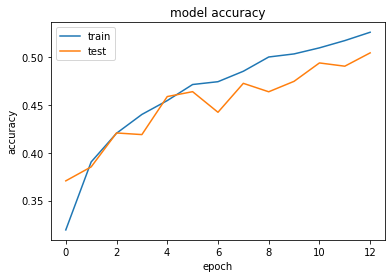

In [338]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

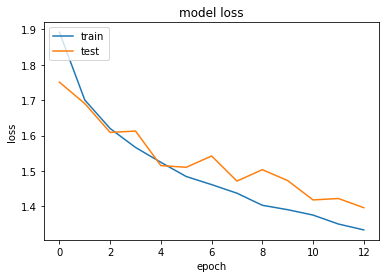

In [339]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [340]:
model.save("cifar.h5")

In [341]:
model.load_weights("cifar.h5")

In [342]:
loaded_model = tf.keras.models.load_model("cifar.h5")

loaded_model.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_14 (Flatten)         (None, 3072)              0         
_________________________________________________________________
dense_56 (Dense)             (None, 256)               786688    
_________________________________________________________________
dense_57 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_58 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_59 (Dense)             (None, 10)                650       
Total params: 828,490
Trainable params: 828,490
Non-trainable params: 0
_________________________________________________________________


In [343]:
xte.shape

(10000, 32, 32, 3)

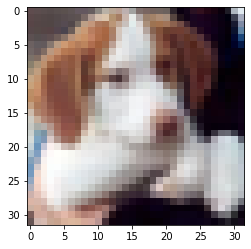

In [344]:
plt.imshow(xte[16])

In [345]:
img=xte[16].reshape(1, 32, 32, 3)

In [346]:
print("Predicted sign: "+ str(loaded_model.predict(img)))

Predicted sign: [[0.00454176 0.01721674 0.00844145 0.39126828 0.00554516 0.4120363
  0.00405437 0.14187826 0.00296579 0.01205203]]


In [347]:
print("Predicted Sign" + str(loaded_model.predict_classes(img)))

Predicted Sign[5]
